# MOVIE RATING ANALYSIS

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, expon, gamma, poisson

# Reading CSV File

In [2]:
df=pd.read_csv("./movies.csv")

In [3]:
df.head() #read first 5 rows

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86


# Data Describe

   **column 1**:-  Title       : Title or Name of the Movie,
   
   **column 2**:-  director    : Name of the Movie Director,
   
   **column 3**:-  release_year: Year of Movie Release,
   
   **column 4**:-  runtime     : Duration of the Movie (in minutes),
   
   **column 5**:-  genre       : Category or Type of the Movie,
   
   **column 6**:-  rating      : Rating or Evaluation of the Movie,
   
   **column 7**:-  metascore   : The score of the movie on the metacritic website,
   
   **column 8**:-  gross(M)    : Gross Earnings of the Movie (in millions)


In [4]:
#last 5 rows
df.tail()

,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
2527,998,The Invisible Man,James Whale,1933,71,Horror,7.6,87,0.0
2528,998,The Invisible Man,James Whale,1933,71,Sci-Fi,7.6,87,0.0
2529,999,Cell 211,Daniel Monzón,2009,113,Action,7.6,0,0.0
2530,999,Cell 211,Daniel Monzón,2009,113,Crime,7.6,0,0.0
2531,999,Cell 211,Daniel Monzón,2009,113,Drama,7.6,0,0.0


In [5]:
# Generate summary statistics for numerical columns 

df.describe()

,Unnamed: 0,release_year,runtime,rating,metascore,gross(M)
count,2532.000000,2532.000000,2532.000000,2532.000000,2532.000000,2532.000000
mean,501.339258,1992.215640,124.213665,7.966035,66.487362,61.656303
std,289.372567,24.244151,28.910941,0.274246,30.519333,113.390273
min,0.000000,1920.000000,45.000000,7.600000,0.000000,0.000000
25%,248.000000,1976.000000,103.000000,7.800000,64.000000,0.280000
50%,503.000000,2000.000000,120.000000,7.900000,76.000000,10.730000
75%,749.000000,2011.000000,139.000000,8.100000,86.000000,68.105000
max,999.000000,2023.000000,321.000000,9.300000,100.000000,936.660000


In [6]:
# Display basic information about the DataFrame , including data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2532 non-null   int64  
 1   title         2532 non-null   object 
 2   director      2532 non-null   object 
 3   release_year  2532 non-null   int64  
 4   runtime       2532 non-null   int64  
 5   genre         2532 non-null   object 
 6   rating        2532 non-null   float64
 7   metascore     2532 non-null   int64  
 8   gross(M)      2532 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 178.2+ KB


In [7]:
# Count the number of unique values in each column 
df.nunique()

Unnamed: 0      1000
title            994
director         560
release_year     102
runtime          142
genre             21
rating            17
metascore         61
gross(M)         708
dtype: int64

In [8]:
#Col null values
df.isnull().sum()


Unnamed: 0      0
title           0
director        0
release_year    0
runtime         0
genre           0
rating          0
metascore       0
gross(M)        0
dtype: int64

# Data Cleaning

In [9]:
# Fill null values with 0
clean =  df.fillna(0)
clean[df.isnull().any(axis=1)]


,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)


In [10]:
# Select specific columns ('title', 'director', 'release_year', 'runtime', 'genre', 'rating', 'gross(M)')
# from the 'clean' DataFrame and export them to a CSV file named 'cleaneddata.csv'.
# Setting index=False ensures that the CSV file does not include the index column.
columns=['title','director','release_year','runtime','genre','rating','gross(M)']
clean[columns].to_csv('./cleaneddata.csv',index=False)

In [11]:
# Read data from the 'cleaneddata.csv' CSV file into a new DataFrame called 'cleandf'.
# Then, display the first five rows of the DataFrame using the 'head()' method.
cleandf=pd.read_csv('./cleaneddata.csv')
cleandf.head()

,title,director,release_year,runtime,genre,rating,gross(M)
0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,28.34
1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,134.97
2,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,134.97
3,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,534.86
4,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,534.86


In [12]:
# Detect and mark duplicate rows in the DataFrame 'cleandf'
cleandf.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2527    False
2528    False
2529    False
2530    False
2531    False
Length: 2532, dtype: bool

In [13]:
# Filter and display rows with at least one null value
cleandf[cleandf.isnull().any(axis=1)]

,title,director,release_year,runtime,genre,rating,gross(M)


# Outlier Analysis

## IQR Method

In [14]:
# Define a function to find outliers in a dataset using the IQR method
def find_outliers_iqr(data=cleandf):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a boolean mask indicating which data points are outliers
    return (data < lower_bound) | (data > upper_bound)
outliers = cleandf[['rating']].apply(find_outliers_iqr)

# Display rows containing potential outliers
potential_outliers = df[outliers.any(axis=1)]
print("Rows with Potential Outliers:")
potential_outliers

Rows with Potential Outliers:


,Unnamed: 0,title,director,release_year,runtime,genre,rating,metascore,gross(M)
0,0,The Shawshank Redemption,Frank Darabont,1994,142,Drama,9.3,82,28.34
1,1,The Godfather,Francis Ford Coppola,1972,175,Crime,9.2,100,134.97
2,1,The Godfather,Francis Ford Coppola,1972,175,Drama,9.2,100,134.97
3,2,The Dark Knight,Christopher Nolan,2008,152,Action,9.0,84,534.86
4,2,The Dark Knight,Christopher Nolan,2008,152,Crime,9.0,84,534.86
...,...,...,...,...,...,...,...,...,...
87,35,Harakiri,Masaki Kobayashi,1962,133,Drama,8.6,85,0.00
88,35,Harakiri,Masaki Kobayashi,1962,133,Mystery,8.6,85,0.00
89,36,Sita Ramam,Hanu Raghavapudi,2022,163,Action,8.6,0,0.00
90,36,Sita Ramam,Hanu Raghavapudi,2022,163,Drama,8.6,0,0.00


## Box Plot

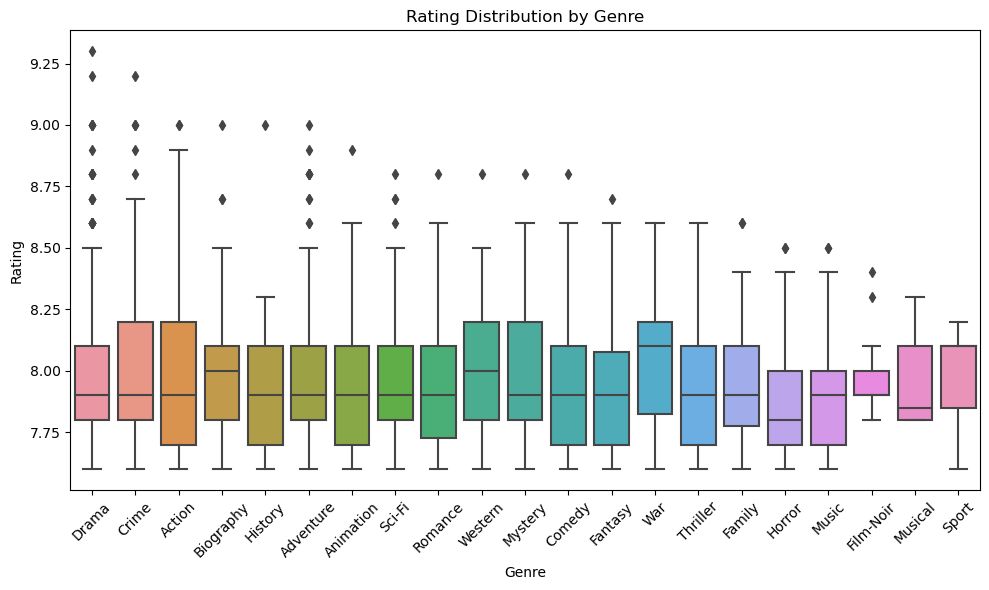

In [15]:
# Create a figure with a specified size (10x6 inches)
plt.figure(figsize=(10, 6))

# Create a boxplot with 'genre' on the x-axis and 'rating' on the y-axis, using data from 'cleandf'
sns.boxplot(x='genre', y='rating', data=cleandf)

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set a label for the x-axis
plt.xlabel('Genre')

# Set a label for the y-axis
plt.ylabel('Rating')

# Set a title for the plot
plt.title('Rating Distribution by Genre')

# Ensure a tight layout for better presentation
plt.tight_layout()

# Display the plot
plt.show()

# Data Visualisation

# Univariate Analysis

## Histogram

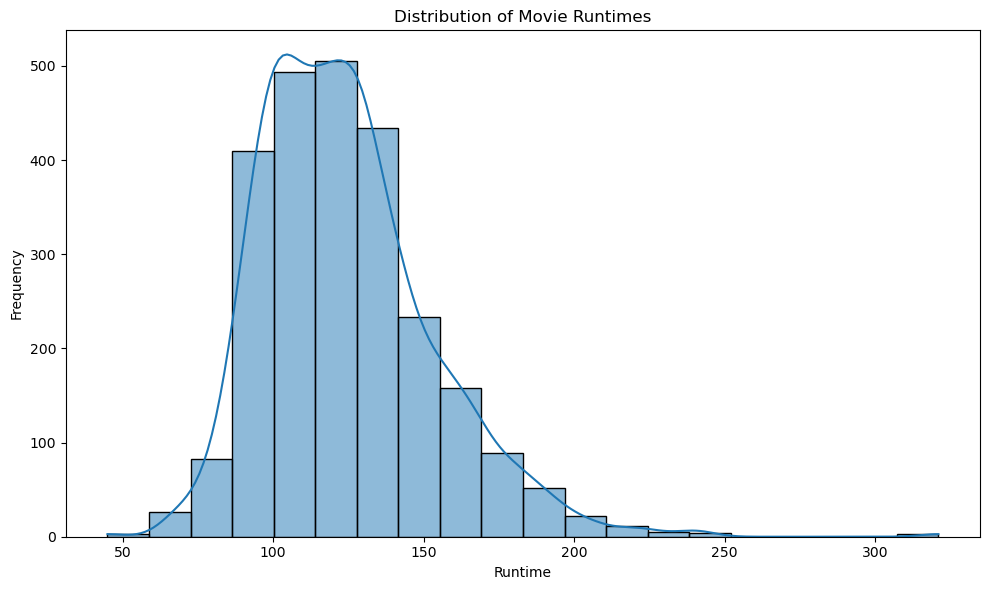

In [16]:
#histogram with a kernel density estimate (KDE) to illustrate the distribution of movie runtimes
plt.figure(figsize=(10, 6))
sns.histplot(cleandf['runtime'], bins=20, kde=True)
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.tight_layout()
plt.show()

## Pie Chart

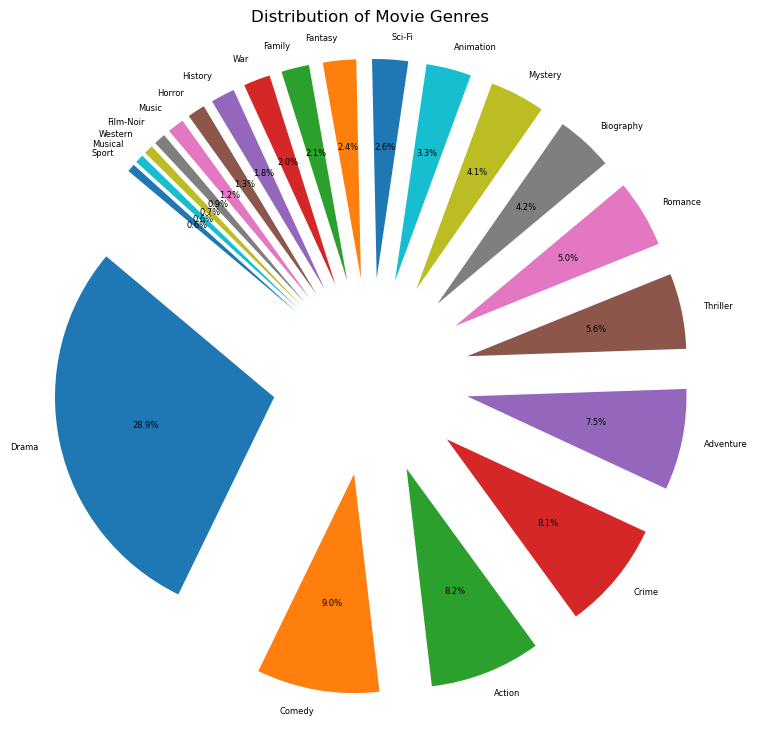

In [17]:
#pie chart to visualize the distribution of movie genres
genre_counts = cleandf['genre'].value_counts()

explode = [0.45] * len(genre_counts)  # Adjust the values for more separation

plt.figure(figsize=(9, 9))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%.1f%%', startangle=140, explode=explode,
        textprops={'fontsize': 6})  # Adjust the fontsize as needed
plt.title('Distribution of Movie Genres')
plt.axis('equal')
plt.show()

## Distribution Plot

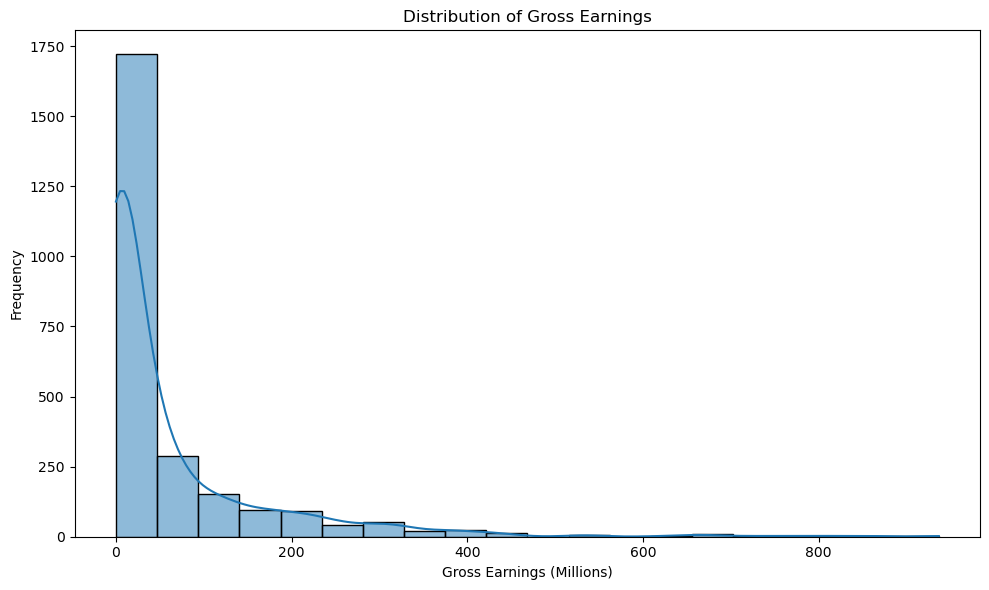

In [18]:
# Creating a distribution plotof gross(M) using Seaborn
plt.figure(figsize=(10, 6))
sns. histplot(data=cleandf, x='gross(M)', bins=20, kde=True)
plt.xlabel('Gross Earnings (Millions)')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Earnings')
plt.tight_layout()
plt.show()

# Bivariate Analysis

## Bar Plot

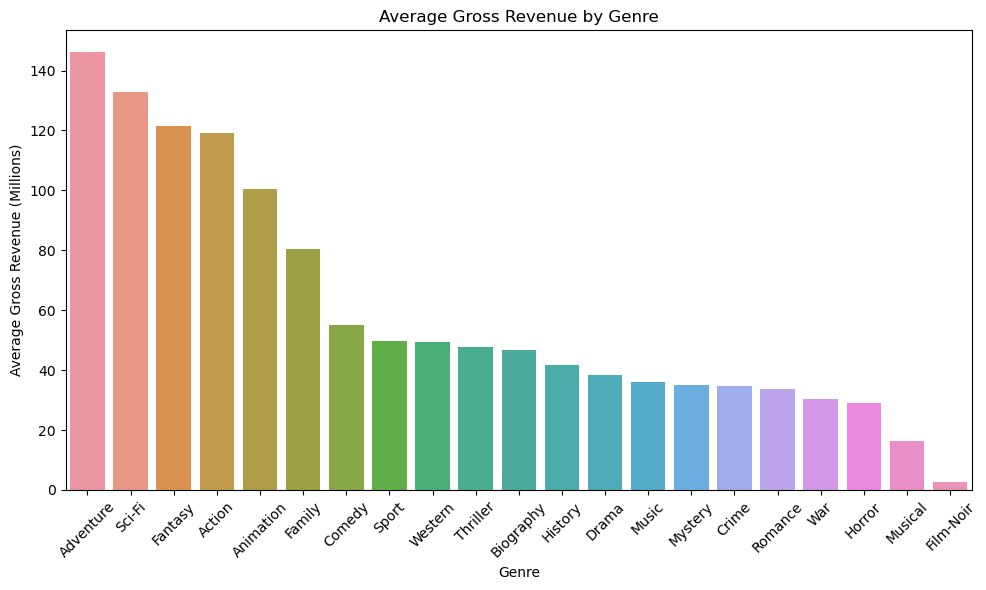

In [19]:
# Bar plot of average gross revenue by genre
avg_gross_by_genre = cleandf.groupby('genre')['gross(M)'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_gross_by_genre.index, y=avg_gross_by_genre.values)
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Average Gross Revenue (Millions)')
plt.title('Average Gross Revenue by Genre')
plt.tight_layout()
plt.show()


## Scatter Plot

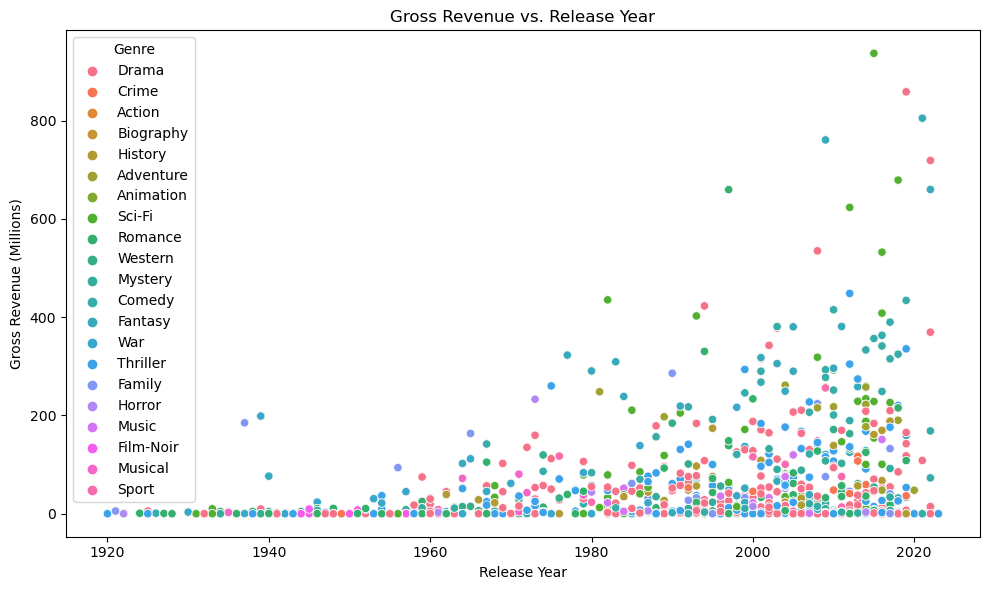

In [20]:
#scatterplot to explore the relationship between movie release years and gross revenues
plt.figure(figsize=(10, 6))
sns.scatterplot(x='release_year', y='gross(M)', data=cleandf, hue='genre')
plt.xlabel('Release Year')
plt.ylabel('Gross Revenue (Millions)')
plt.title('Gross Revenue vs. Release Year')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

## Violin Plot

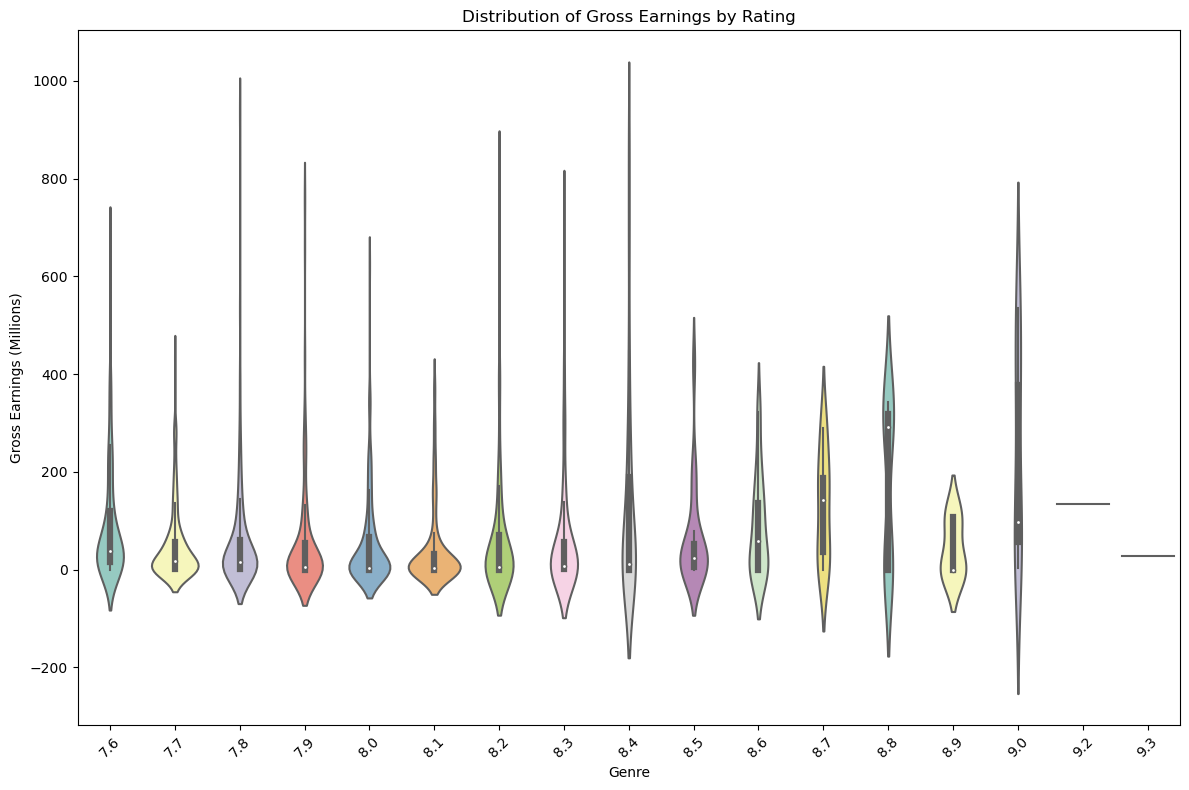

In [21]:
# Create a violin plot to visualize the distribution of gross earnings (in millions) across different movie ratings
plt.figure(figsize=(12, 8))
sns.violinplot(x='rating', y='gross(M)', data=cleandf, palette='Set3')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Gross Earnings (Millions)')
plt.title('Distribution of Gross Earnings by Rating')
plt.tight_layout()
plt.show()


# Multivariate Analysis

## Heat Map

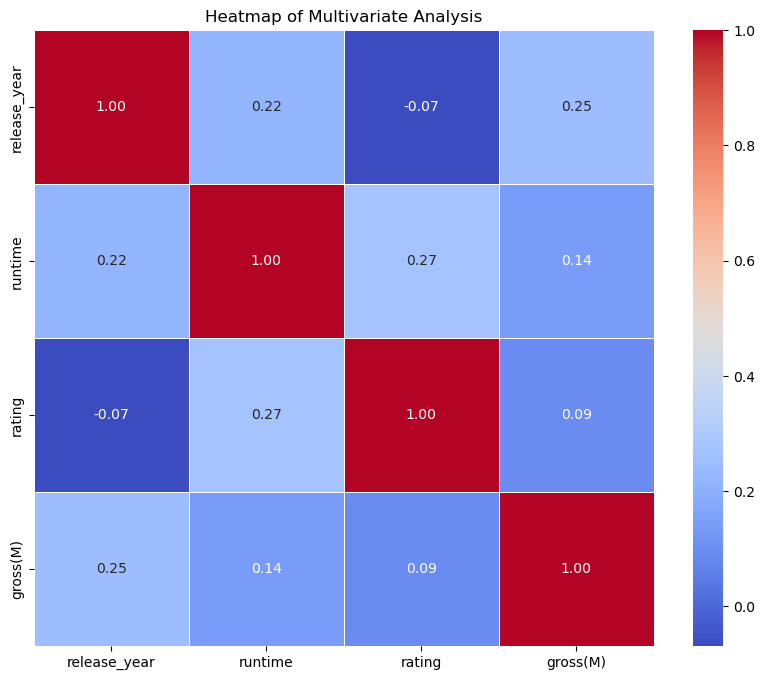

In [22]:
selected_columns = ['release_year', 'runtime', 'rating', 'gross(M)']
subset_df = cleandf[selected_columns]

# Create a correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Multivariate Analysis')
plt.show()

## Pair plot

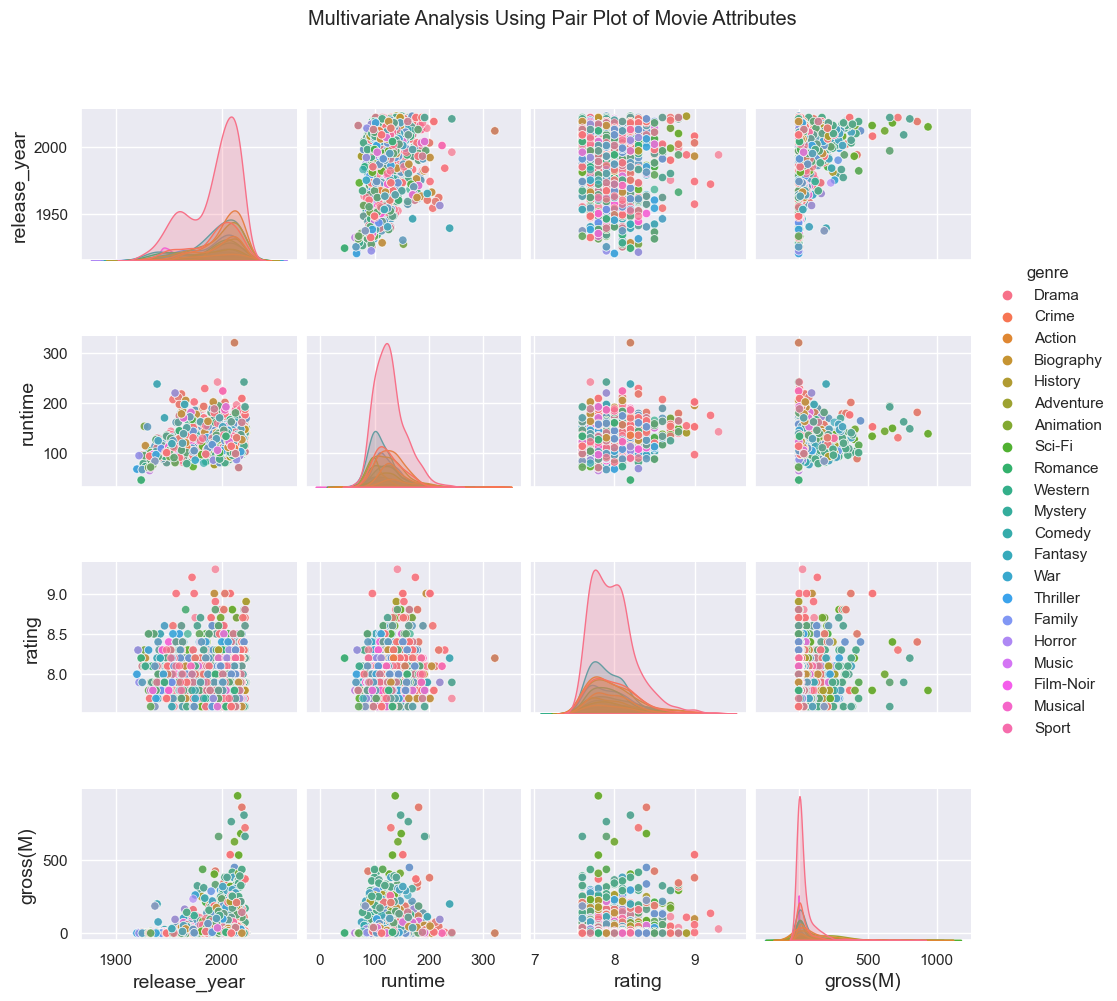

In [23]:
# Selecting the specified columns
subset_columns = ['title', 'release_year', 'runtime', 'genre', 'rating', 'gross(M)']

# Filtering the DataFrame
subset_df = cleandf[subset_columns]

# Setting Seaborn runtime configurations for more space
sns.set(rc={'axes.labelsize': 14, 'axes.titlesize': 18, 'axes.titlepad': 20})

# Creating a pair plot using Seaborn
plot = sns.pairplot(data=subset_df, hue='genre', plot_kws={'alpha': 0.7})

# Adjusting layout for more space between plot and axes titles
plot.fig.suptitle('Multivariate Analysis Using Pair Plot of Movie Attributes', y=1.00)
plt.subplots_adjust(top=0.9, hspace=0.5)  # Increase the top margin and adjust vertical space
plt.show()

## DISTRIBUTIONS

## Poisson Distribution of Rating

C:\Users\kisho\AppData\Local\Temp\ipykernel_18856\793042528.py:12: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x_poisson, p_poisson, 'r-', label='Poisson Distribution')


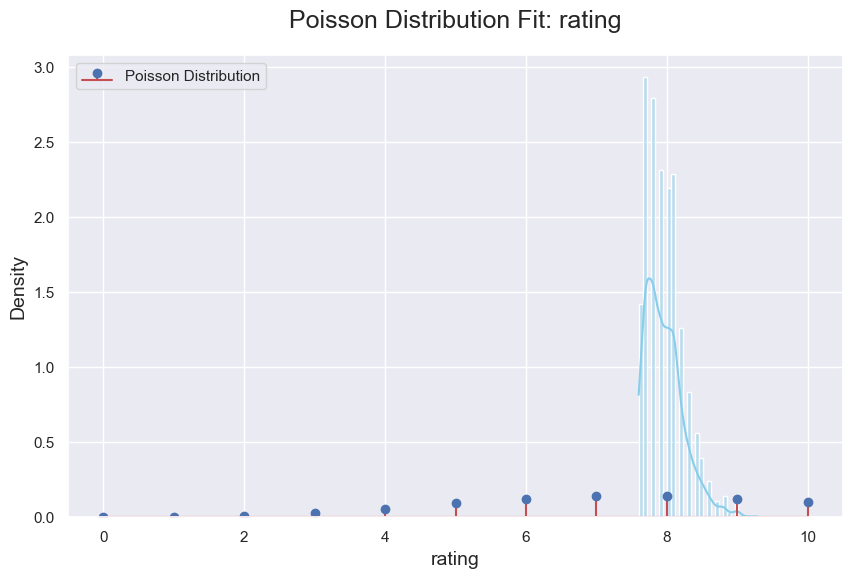

In [24]:
# Choose a column for the Poisson distribution (e.g., 'rating')
column_name = 'rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Poisson distribution to the data
mu = df[column_name].mean()
x_poisson = np.arange(0, df[column_name].max() + 1)
p_poisson = poisson.pmf(x_poisson, mu)
plt.stem(x_poisson, p_poisson, 'r-', label='Poisson Distribution')

plt.title(f'Poisson Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

## Exponential Distribution of Rating

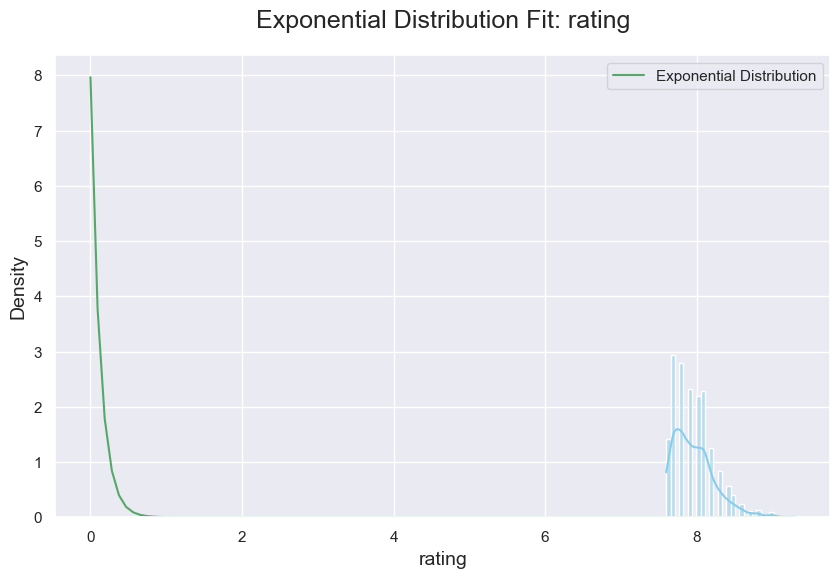

In [25]:
# Choose a column for the Exponential distribution (e.g., 'rating')
column_name = 'rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit an Exponential distribution to the data
scale = 1 / df[column_name].mean()
x_exp = np.linspace(0, df[column_name].max(), 100)
p_exp = expon.pdf(x_exp, scale=scale)
plt.plot(x_exp, p_exp, 'g-', label='Exponential Distribution')

plt.title(f'Exponential Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

## Gamma Distribution of Rating

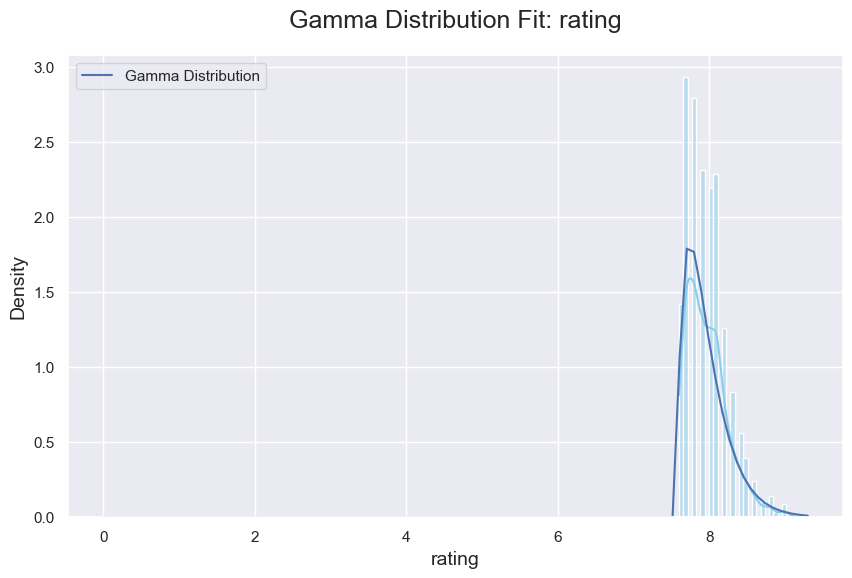

In [26]:
# Choose a column for the Gamma distribution (e.g., 'rating')
column_name = 'rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Gamma distribution to the data
a, loc, scale = gamma.fit(df[column_name])
x_gamma = np.linspace(0, df[column_name].max(), 100)
p_gamma = gamma.pdf(x_gamma, a, loc, scale)
plt.plot(x_gamma, p_gamma, 'b-', label='Gamma Distribution')

plt.title(f'Gamma Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

## Normal Distribution of Rating

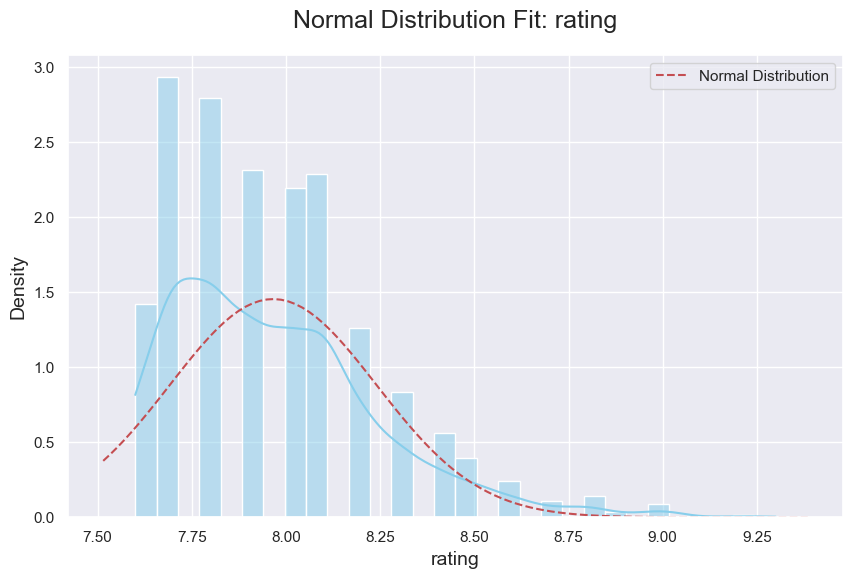

In [27]:
# Choose a column for the Normal distribution (e.g., 'rating')
column_name = 'rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Normal distribution to the data
mean, std = norm.fit(df[column_name])
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mean, std)
plt.plot(x_norm, p_norm, 'r--', label='Normal Distribution')

plt.title(f'Normal Distribution Fit: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()


## Combination of All Distributions of Rating

C:\Users\kisho\AppData\Local\Temp\ipykernel_18856\1438145475.py:31: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(x_poisson, p_poisson, 'purple', label='Poisson Distribution')


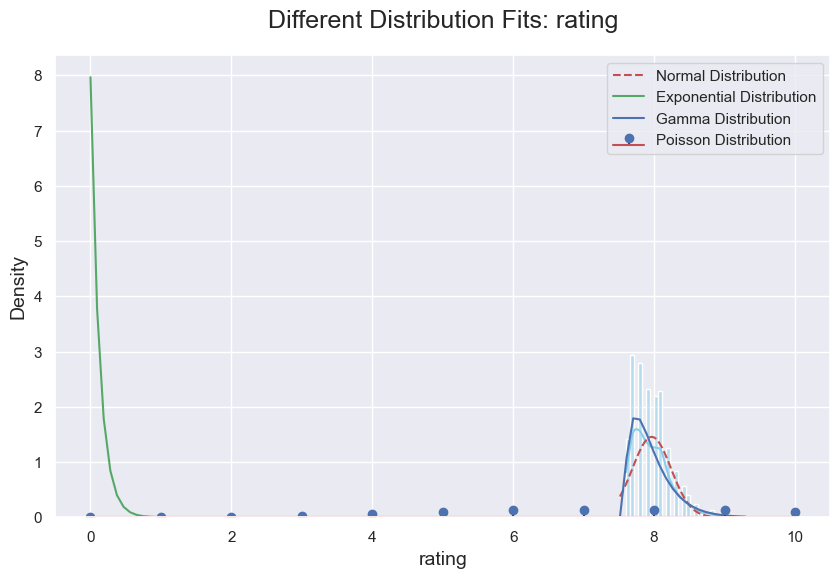

In [28]:
# Choose a column for the distribution fits (e.g., 'rating')
column_name = 'rating'

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=30, kde=True, color='skyblue', stat='density')

# Fit a Normal distribution to the data
mean, std = norm.fit(df[column_name])
xmin, xmax = plt.xlim()
x_norm = np.linspace(xmin, xmax, 100)
p_norm = norm.pdf(x_norm, mean, std)
plt.plot(x_norm, p_norm, 'r--', label='Normal Distribution')

# Fit an Exponential distribution to the data
scale = 1 / df[column_name].mean()
x_exp = np.linspace(0, df[column_name].max(), 100)
p_exp = expon.pdf(x_exp, scale=scale)
plt.plot(x_exp, p_exp, 'g-', label='Exponential Distribution')

# Fit a Gamma distribution to the data
a, loc, scale = gamma.fit(df[column_name])
x_gamma = np.linspace(0, df[column_name].max(), 100)
p_gamma = gamma.pdf(x_gamma, a, loc, scale)
plt.plot(x_gamma, p_gamma, 'b-', label='Gamma Distribution')

# Fit a Poisson distribution to the data
mu = df[column_name].mean()
x_poisson = np.arange(0, df[column_name].max() + 1)
p_poisson = poisson.pmf(x_poisson, mu)
plt.stem(x_poisson, p_poisson, 'purple', label='Poisson Distribution')

plt.title(f'Different Distribution Fits: {column_name}')
plt.xlabel(column_name)
plt.legend()
plt.show()

# Hypothesis Testing of Rating Column

In [29]:
# Extract the 'rating' column from the data
rating_data = df['rating']

# Perform t-test
desired_mean=df["rating"].mean()
t_stat, p_value = stats.ttest_1samp(rating_data, popmean=desired_mean)

# Define significance level
alpha = 0.05

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Compare p-value with alpha to determine statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. The mean rating is significantly different from the desired mean.")
else:
    print("Fail to reject the null hypothesis. The mean rating is not significantly different from the desired mean.")

T-statistic: 2.085938092009581e-11
P-value: 0.9999999999833582
Fail to reject the null hypothesis. The mean rating is not significantly different from the desired mean.


In [30]:
#T-statistic: The computed t-statistic is very close to zero, specifically 2.085938092009581e-11. This extremely small value indicates that the mean rating in the 'rating' column is very close to the assumed population mean.

#P-value: The p-value is calculated to be 0.9999999999833582, which is very close to 1. This high p-value suggests that there is a high probability of observing the mean rating from the sample data if the true population mean were equal to the calculated 'desired_mean'.

#Interpretation: The phrase "Fail to reject the null hypothesis" in the output indicates that based on the computed statistics, there is no significant difference between the mean rating in your dataset and the assumed population mean. In other words, there is no strong statistical evidence to suggest that the mean rating significantly differs from the assumed population mean.

#In summary, the output suggests that the mean rating in your dataset is not significantly different from the desired mean, as the p-value is high and the t-statistic is very close to zero.

# Analysis Questions

## 1. What are the most common genres among the top-rated movies?

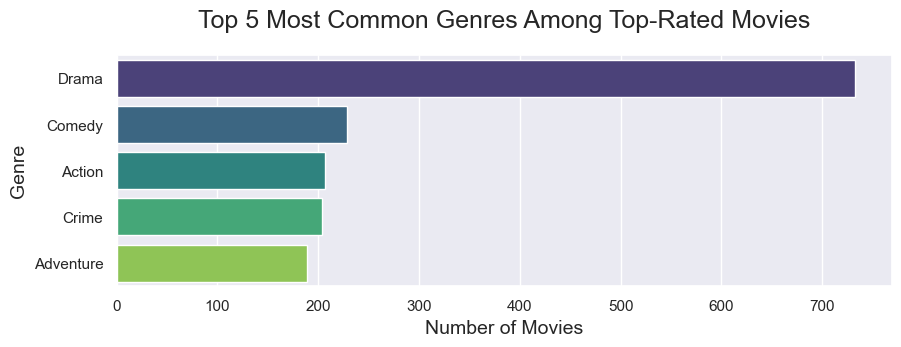

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./movies.csv')

df['genre'] = df['genre'].str.split(',')

# Create a new DataFrame to store individual genres
genres_df = df['genre'].explode()

# Count the occurrences of each genre
genre_counts = genres_df.value_counts()

# Select the top 5 most common genres
top_genres = genre_counts.head(5)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 3))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")

# Set labels and title
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 5 Most Common Genres Among Top-Rated Movies')

# Display the plot
plt.show()


# 2. Who are the top directors in terms of the number of movies, and what is the average rating for each with a bar plot?

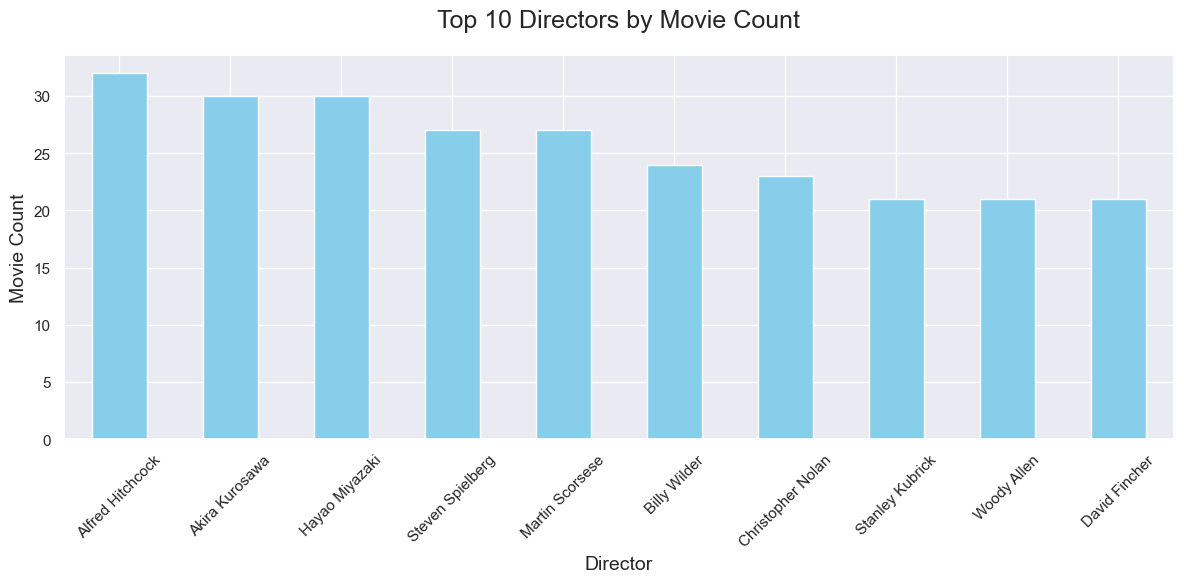

Alfred Hitchcock     32
Akira Kurosawa       30
Hayao Miyazaki       30
Steven Spielberg     27
Martin Scorsese      27
Billy Wilder         24
Christopher Nolan    23
Stanley Kubrick      21
Woody Allen          21
David Fincher        21
Name: director, dtype: int64

In [32]:
top_directors = cleandf['director'].value_counts().head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Directors by Movie Count')
plt.xlabel('Director')
plt.ylabel('Movie Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()
top_directors

# 3. What is the average gross revenue for each genre, Explain with a box plot?

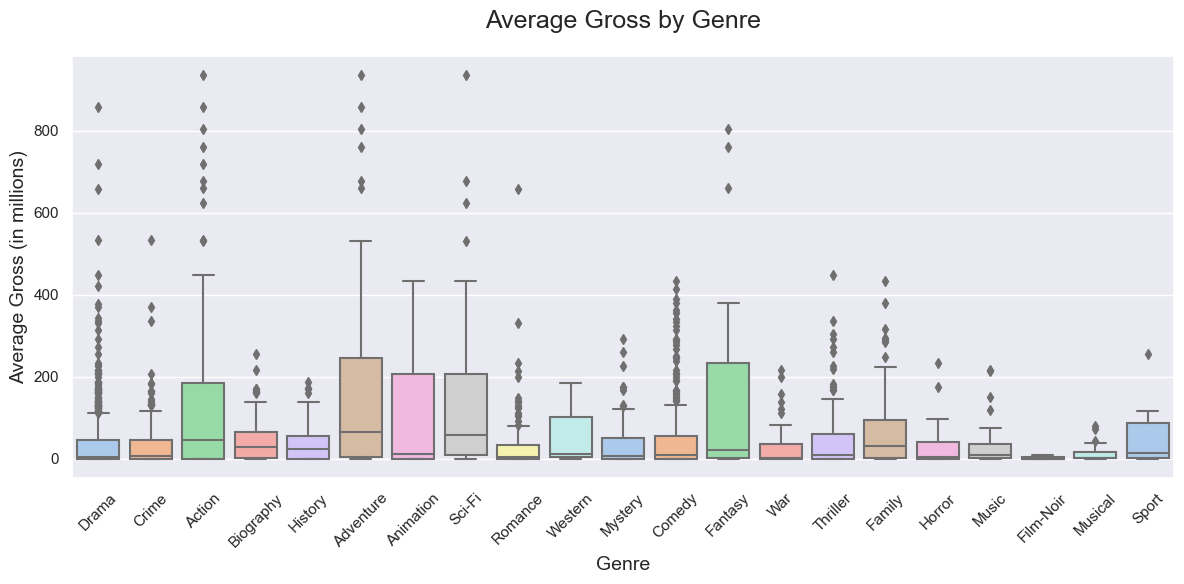

genre
Action       119.063865
Adventure    146.117778
Animation    100.601786
Biography     46.679159
Comedy        55.214105
Crime         34.660637
Drama         38.428675
Family        80.295192
Fantasy      121.605645
Film-Noir      2.634091
History       41.826222
Horror        29.087273
Music         35.931935
Musical       16.360625
Mystery       34.947282
Romance       33.729921
Sci-Fi       132.793582
Sport         49.810667
Thriller      47.626738
War           30.460400
Western       49.331765
Name: gross(M), dtype: float64

In [33]:
# Assuming you have already calculated 'avg_gross_by_genre' as you mentioned
avg_gross_by_genre = cleandf.groupby('genre')['gross(M)'].mean()

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='gross(M)', data=cleandf, palette='pastel')
plt.title('Average Gross by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Gross (in millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()
avg_gross_by_genre

# 4. How has the number of movies and average ratings changed over the first 5 years,using Area Plot?

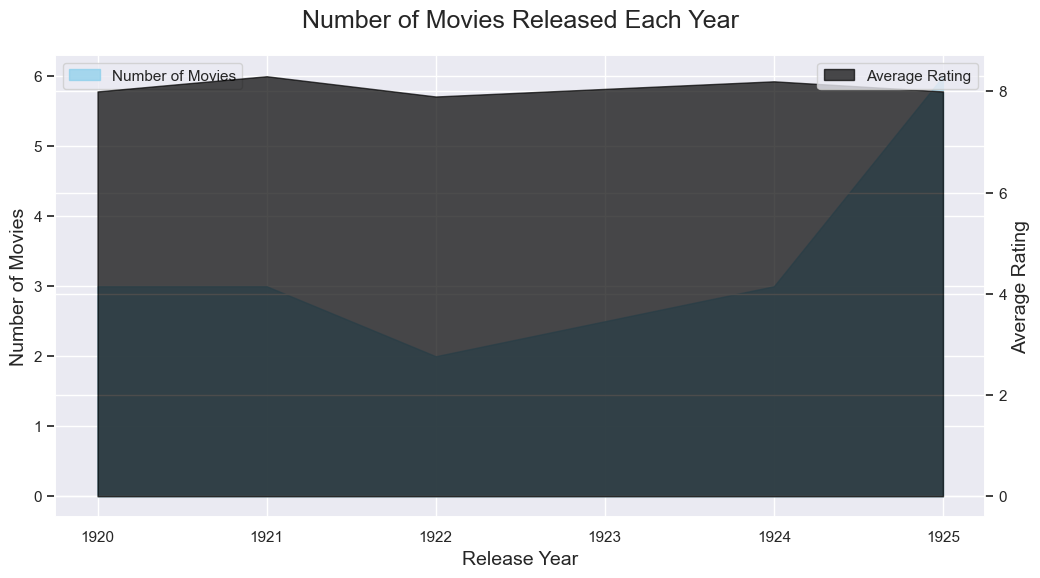

release_year
1920    8.0
1921    8.3
1922    7.9
1924    8.2
1925    8.0
Name: rating, dtype: float64

In [34]:
# Assuming you have already calculated 'movies_per_year' and 'avg_rating_per_year' as you mentioned
movies_per_year = cleandf['release_year'].value_counts().sort_index().head()
avg_rating_per_year = cleandf.groupby('release_year')['rating'].mean().head()

# Create a figure
plt.figure(figsize=(12, 6))

# Plotting the number of movies released each year as an area plot
plt.fill_between(movies_per_year.index, movies_per_year.values, color='skyblue', alpha=0.7, label='Number of Movies')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.legend(loc='upper left')

# Create a second y-axis for average ratings and plot as an area plot
plt.twinx()
plt.fill_between(avg_rating_per_year.index, avg_rating_per_year.values, color='black', alpha=0.7, label='Average Rating')
plt.ylabel('Average Rating')
plt.legend(loc='upper right')

plt.show()
movies_per_year
avg_rating_per_year

# 5. Are there any standout movies that significantly contributed to the total gross earnings??

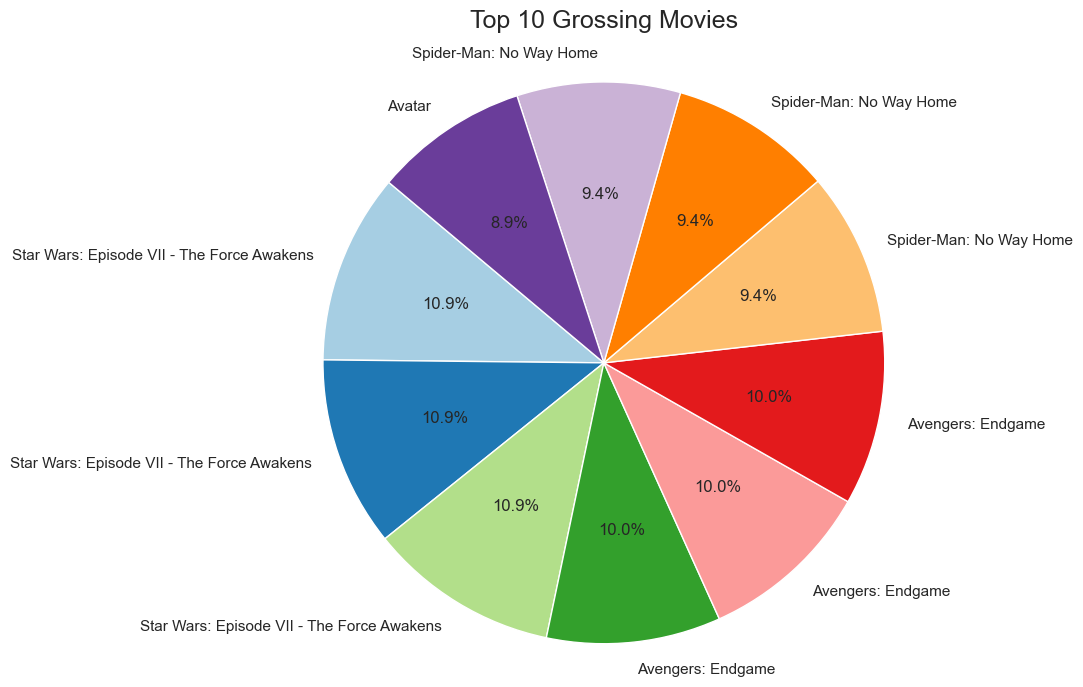

1591    Star Wars: Episode VII - The Force Awakens
1590    Star Wars: Episode VII - The Force Awakens
1589    Star Wars: Episode VII - The Force Awakens
154                              Avengers: Endgame
155                              Avengers: Endgame
156                              Avengers: Endgame
359                        Spider-Man: No Way Home
360                        Spider-Man: No Way Home
358                        Spider-Man: No Way Home
1180                                        Avatar
Name: title, dtype: object

In [35]:
# Assuming you have already calculated 'top_grossing_movies' as you mentioned
top_grossing_movies = cleandf.sort_values(by='gross(M)', ascending=False).head(10)

# Extract movie names and gross earnings
movie_names = top_grossing_movies['title']
gross_earnings = top_grossing_movies['gross(M)']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(gross_earnings, labels=movie_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Grossing Movies')

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

plt.show()
movie_names

# 6. Which genres tend to have the highest and lowest average ratings?

In [36]:
df = pd.read_csv('./movies.csv')

# Calculate the average rating for each genre
average_rating_by_genre = df.groupby('genre')['rating'].mean().sort_values(ascending=False)

# Display the genres with the highest and lowest average ratings
highest_rated_genre = average_rating_by_genre.idxmax()
lowest_rated_genre = average_rating_by_genre.idxmin()

print(f"The genre with the highest average rating is: {highest_rated_genre}")
print(f"The genre with the lowest average rating is: {lowest_rated_genre}")

The genre with the highest average rating is: Western
The genre with the lowest average rating is: Horror


# 7. Which decade had the most highly-rated movies on average?

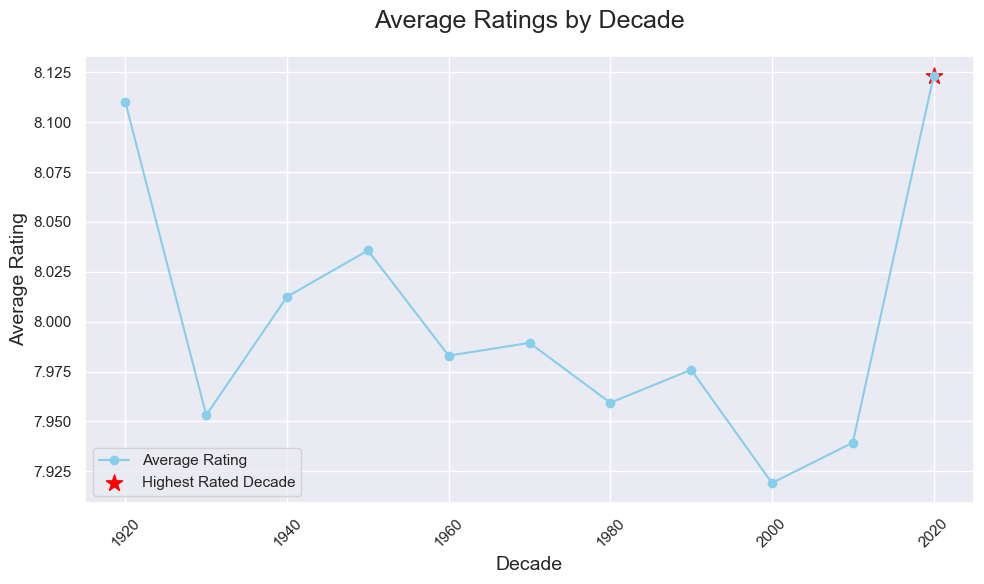

In [37]:
cleandf['decade'] = cleandf['release_year'] // 10 * 10
average_ratings_by_decade = cleandf.groupby('decade')['rating'].mean()
highest_rated_decade = average_ratings_by_decade.idxmax()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_decade.index, average_ratings_by_decade.values, marker='o', color='skyblue', label='Average Rating')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Decade')

# Highlight the highest-rated decade with a different marker and color
plt.scatter(highest_rated_decade, average_ratings_by_decade[highest_rated_decade], color='red', marker='*', s=150, label='Highest Rated Decade')

plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# 8. What is the overall trend in movie gross revenue over time?

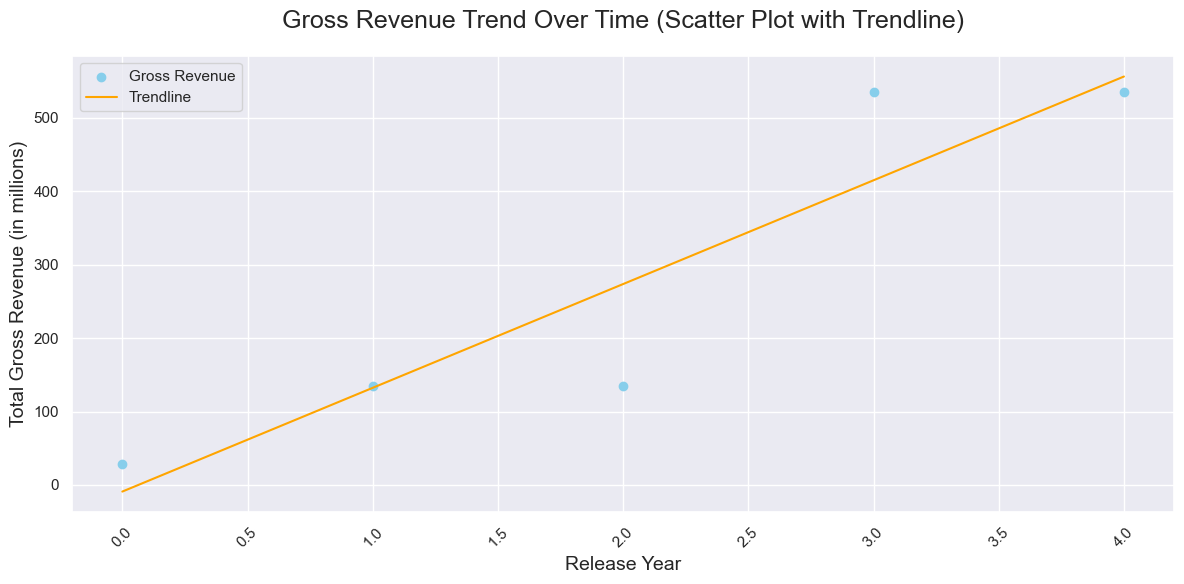

0     28.34
1    134.97
2    134.97
3    534.86
4    534.86
Name: gross(M), dtype: float64

In [38]:
gross_revenue_trend_over_time = cleandf['gross(M)'].head()

# Extract the release years and total gross revenue
release_years = gross_revenue_trend_over_time.index
total_gross_revenue = gross_revenue_trend_over_time.values

# Fit a linear trendline manually
slope, intercept = np.polyfit(release_years, total_gross_revenue, 1)

# Calculate the trendline values
trendline = slope * release_years + intercept

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(release_years, total_gross_revenue, color='skyblue', label='Gross Revenue')

# Plot the trendline
plt.plot(release_years, trendline, '-', color='orange', label='Trendline')

plt.xlabel('Release Year')
plt.ylabel('Total Gross Revenue (in millions)')
plt.title('Gross Revenue Trend Over Time (Scatter Plot with Trendline)')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
gross_revenue_trend_over_time

# 9. How has the average rating of movies changed over the years?

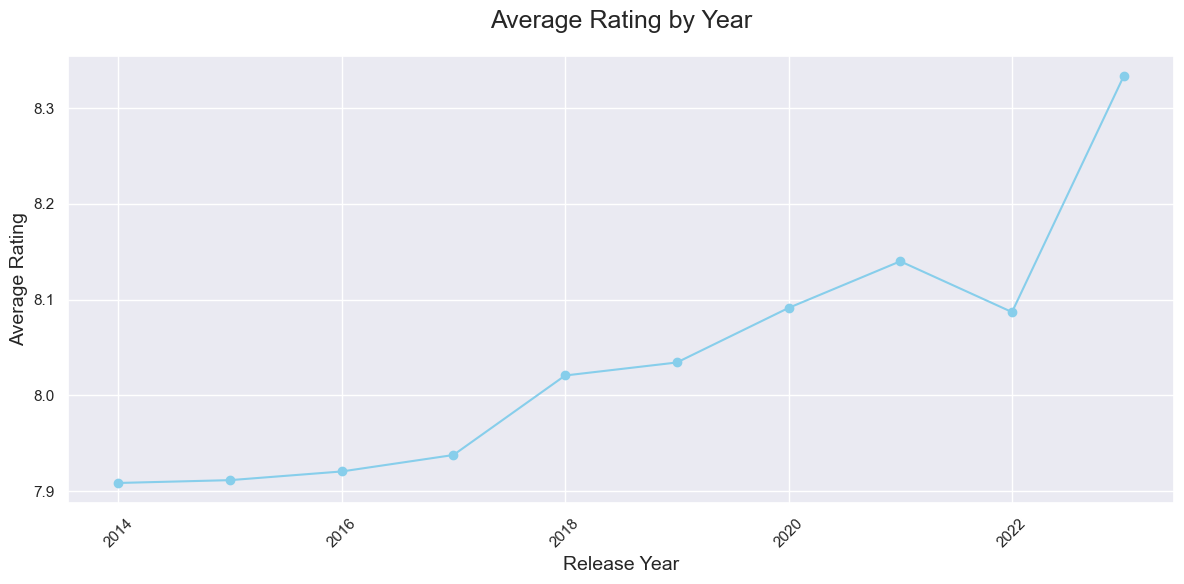

release_year
2014    7.908537
2015    7.911475
2016    7.920548
2017    7.937736
2018    8.020755
2019    8.034328
2020    8.091304
2021    8.140000
2022    8.086957
2023    8.333333
Name: rating, dtype: float64

In [39]:
average_rating_by_year = df.groupby('release_year')['rating'].mean().tail(10)

# Create a line plot
plt.figure(figsize=(12, 6))
average_rating_by_year.plot(kind='line', color='skyblue', marker='o')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
average_rating_by_year

# 10. How many movies in each genre have a rating above a certain threshold?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a CSV file named 'movies_dataset.csv'
# Replace 'movies_dataset.csv' with the actual file name if needed
df = pd.read_csv('./movies.csv')

# Get the rating threshold from the user
rating_threshold = float(input("Enter the rating threshold: "))

# Filter movies above the rating threshold
high_rating_movies = df[df['rating'] > rating_threshold]

# Count the number of movies in each genre
genre_count = high_rating_movies['genre'].value_counts()

# Plot a bar graph for the number of movies in each genre above the rating threshold
plt.figure(figsize=(12, 8))
genre_count.plot(kind='bar', color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title(f'Number of Movies in Each Genre with Rating Above {rating_threshold}')
plt.xticks(rotation=45, ha='right')
plt.show()

# 11. How has the number of movies released each year changed over time?

In [ ]:
movies_per_year = cleandf['release_year'].value_counts().sort_index().tail(10)
movies_per_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.grid(True)
plt.show()
movies_per_year.head(10)

# 12. Are there any significant differences in the average gross revenue of movies released in different decades?

In [ ]:
import pandas as pd

# Assuming your dataset is stored in a CSV file named 'movies_dataset.csv'
# Replace 'movies_dataset.csv' with the actual file name if needed
df = pd.read_csv('./movies.csv')

# Create a new column for the decade based on the release year
df['decade'] = (df['release_year'] // 10) * 10

# Calculate the average gross revenue for each decade
decade_stats = df.groupby('decade')['gross(M)'].mean().reset_index()

# Display the results
print(decade_stats)

# 13. What is the relationship between runtime and gross revenue for each genre?

In [ ]:
import seaborn as sns
sns.scatterplot(x='runtime', y='gross(M)', hue='genre', data=cleandf)
plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross Revenue (Millions)')
plt.title('Relationship between Runtime and Gross Revenue by Genre')
plt.show()

# 14. What is the distribution of movie ratings?

In [ ]:
plt.figure(figsize=(12, 3))
plt.hist(cleandf['rating'], bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings')
plt.show()

# 15. How many movies fall under each rating category?

In [ ]:
rating_counts = cleandf['rating'].value_counts()

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=cleandf, x='rating', order=rating_counts.index, palette='Set3')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count of Movies by Rating')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 16. Which directors have the highest variance in movie ratings?

In [ ]:
director_rating_variance = cleandf.groupby('director')['rating'].var().nlargest(10)

# Filter the DataFrame to include movies only by the top 10 directors
filtered_df = cleandf[cleandf['director'].isin(director_rating_variance.index)]

# Create a violin plot
plt.figure(figsize=(12, 5))
sns.violinplot(data=filtered_df, x='director', y='rating', palette='Set2')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.title('Rating Variance Distribution for Top 10 Directors (Violin Plot)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 17. Find and plot a graph of directors with the highest variance in movie ratings

In [ ]:
# Calculating the variance in ratings for each director
director_rating_variance = cleandf.groupby('director')['rating'].var().nlargest(10)

# Creating a bar plot to visualize the directors with the highest rating variance
plt.figure(figsize=(12, 6))
director_rating_variance.plot(kind='bar', color='skyblue')
plt.xlabel('Director')
plt.ylabel('Rating Variance')
plt.title('Directors with the Highest Variance in Movie Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# 18. Display the  movies by rating when you input a year?

In [ ]:
# Prompt the user to enter a year
year = int(input("Enter a year: "))

# Filter the DataFrame to include only movies from the entered year
filtered_df = cleandf[df['release_year'] == year].head()

# Create a histogram of movie ratings for the entered year
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Movie Ratings in {}'.format(year))

plt.tight_layout()
plt.show()

filtered_df

# 19. Take director's name as input and then provide the list of movies directed by that director?

In [ ]:

# Prompt the user to enter a director's name
director_name = input("Enter a director's name: ")

# Filter the DataFrame to include only movies directed by the entered director
movies_by_director = df[df['director'] == director_name]

# Check if there are any movies by the director
if movies_by_director.empty:
    print(f"No movies found for director {director_name}.")
else:
    # Display the list of movies by the director
    print(f"\nMovies directed by {director_name}:")
    print(movies_by_director[['title', 'release_year','genre']])

# 20. Create a pie chart which tells the percentage of movies directed by given director?

In [ ]:
# Prompt the user to enter a director's name
director_name = input("Enter a director's name: ")

# Filter the DataFrame to include only movies directed by the entered director
movies_by_director = df[df['director'] == director_name]

# Check if there are any movies by the director
if movies_by_director.empty:
    print(f"No movies found for director {director_name}.")
else:
    # Count the total number of movies directed by this director
    total_movies = len(movies_by_director)
    
    # Count the total number of movies by other directors
    other_directors = len(df) - total_movies
    
    # Create a list of labels and sizes for the pie chart
    labels = [director_name, 'Other Directors']
    sizes = [total_movies, other_directors]
    
    # Create a pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Display the pie chart
    plt.title(f"Percentage of Movies Directed by {director_name}")
    plt.show()

## 20. Are there any outliers in terms of exceptionally high or low IMDb ratings compared to their genres or release years?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming your dataset is in a CSV file named 'movies_data.csv'
# Replace 'movies_data.csv' with the actual name and path of your dataset
df = pd.read_csv('./movies.csv')

# Calculate z-scores for IMDb ratings within each genre
df['z_score_genre'] = df.groupby('genre')['rating'].transform(lambda x: stats.zscore(x))

# Calculate z-scores for IMDb ratings within each release year
df['z_score_year'] = df.groupby('release_year')['rating'].transform(lambda x: stats.zscore(x))

# Set a threshold for identifying outliers (e.g., z-score greater than 3 or less than -3)
outlier_threshold = 3

# Identify outliers based on z-scores
outliers_genre = df[(abs(df['z_score_genre']) > outlier_threshold)]
outliers_year = df[(abs(df['z_score_year']) > outlier_threshold)]

# Create boxplots to visualize outliers
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='genre', y='rating', data=outliers_genre, palette="Set2")
plt.title('Outliers by Genre')

plt.subplot(1, 2, 2)
sns.boxplot(x='release_year', y='rating', data=outliers_year, palette="Set2")
plt.title('Outliers by Release Year')

# Display the plot
plt.tight_layout()
plt.show()